# Daily Confirmed Cases and 5-day Moving Average of different Indian States

Confirmed cases of a state are based on a dataset provided by covid19india.org namely 'statewise daily'. The dataset consist of states and their datewise cases. We have calculated Moving average of these cases for a window of 5 days.

This script fetches the online datasets and parses through them for the required states and plots the daily confirmed cases in a bar form and shows the moving average in form of a line.

Datasets can be found here: https://api.covid19india.org/csv/. Their official github page is: https://github.com/covid19india/covid19india-react

Note: State name being used in code is compulsorily same as in datasets' column 'State'

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import DateFormatter

### Import and Load Datasets
#### Daily cases State-wise
In link provided above one can see various datasets in form of comma separated files(csv), we will import Datewise for States: 
 *'state_wise_daily.csv'*

In [2]:
# Getting the state-wise daily data 
StateDailydf = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
StateDailydf.fillna(0, inplace=True)
StateDailydf

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,29-May-20,Recovered,11735,0,101,0,22,159,0,17,...,3,429,0,765,36,0,195,23,107,0
230,29-May-20,Deceased,269,0,1,0,0,0,0,1,...,2,4,0,9,4,0,4,0,7,0
231,30-May-20,Confirmed,8304,0,131,1,128,206,0,32,...,36,252,0,938,74,17,256,33,317,370
232,30-May-20,Recovered,4304,0,55,0,38,102,10,2,...,18,495,0,687,31,5,241,0,195,0


### Setting Duration with Terminal Dates


In [3]:
# Setting start and latest date
dfshape = StateDailydf.shape
BeginDate = datetime.strptime(StateDailydf['Date'][0],'%d-%b-%y').strftime("%d %B %Y")
EndDate = datetime.strptime(StateDailydf['Date'][dfshape[0]-1],'%d-%b-%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)

14 March 2020
30 May 2020


### Preprocessing

The data columns represent states in their coded form, therefore we have created a dictionary representing their names

In [4]:
# Creating a dictionary for State codes as mentioned in above dataset
statesUT = {
    'TT': 'India',
    'AN':'Andaman and Nicobar Islands',
    'AP':'Andhra Pradesh',
    'AR':'Arunachal Pradesh',
    'AS':'Assam',
    'BR':'Bihar',
    'CH':'Chandigarh',
    'CT':'Chhattisgarh',
    'DN':'Dadra and Nagar Haveli',
    'DD':'Daman and Diu',
    'DL':'Delhi',
    'GA':'Goa',
    'GJ':'Gujarat',
    'HR':'Haryana',
    'HP':'Himachal Pradesh',
    'JK':'Jammu and Kashmir',
    'JH':'Jharkhand',
    'KA':'Karnataka',
    'KL':'Kerala',
    'LA':'Ladakh',
    'LD':'Lakshadweep',
    'MP':'Madhya Pradesh',
    'MH':'Maharashtra',
    'MN':'Manipur',
    'ML':'Meghalaya',
    'MZ':'Mizoram',
    'NL':'Nagaland',
    'OR':'Odisha',
    'PY':'Puducherry',
    'PB':'Punjab',
    'RJ':'Rajasthan',
    'SK':'Sikkim',
    'TN':'Tamil Nadu',
    'TG':'Telangana',
    'TR':'Tripura',
    'UP':'Uttar Pradesh',
    'UT':'Uttarakhand',
    'WB':'West Bengal'
}

### Function for Parsing Data

#### Fetch State Function

*Params*: State name

*Returns*: State Dataframe

The dataset consists of Confirmed, Recovered and Deceased cases, we parse the dataset to find a particular state's Confirmed  values and then calculate Moving Average and finally create the dataframe. The dataframe is printed and returned.

In [5]:
# Function to get 'confirmed' cases of a particular state from main dataset and making its 5 - day moving average
def fetchstate(state):
    
    Dateslist = pd.date_range(BeginDate, EndDate)

    stateindex = list(statesUT.keys())[list(statesUT.values()).index(state)]
    CCdata = []
    
    for i in range(dfshape[0]):
        if StateDailydf['Status'][i] == 'Confirmed':
            CCdata.append(StateDailydf[stateindex][i])

    df = pd.DataFrame(list(CCdata),index = Dateslist, columns = ['Confirmed'])
    df['MA'] = df.iloc[:,0].rolling(window=5).mean()
    df.fillna(0, inplace = True)
    print(state)
    print(df)
    return df

### Function for plotting the graph

*Params*: List of States (Number of States should be a multiple of 3)

*Returns*: None

Function plot subplots showing each state data as a bar graph (x-axis: Dates, y-axis: No. of cases daily), See the moving average line going through the bars. Final plot is also saved in the same directory as 'png' file.

In [6]:
# Function plots the data in columns of 3 of list of states passed as parameter
def PlotConfirmandMA(loc):

    noc = len(loc)
    nor = math.ceil(noc/3)
    
    fig, axes = plt.subplots(nrows = nor, ncols = 3, figsize = (25,18))
    fig.suptitle('Confirmed cases and 5-day Moving Average in India and its states as of ' + EndDate, fontsize = 20)
    plt.subplots_adjust(hspace = .4)
    
    k = 0
    for i in range(nor):
        for j in range(3):
            if k < noc:
                StateData = fetchstate(loc[k])
                
                axes[i,j].bar(StateData.index, StateData['Confirmed'], color = 'cyan', width = 1, edgecolor = 'gray', linewidth = 0.05, label = 'Daily Confirmed Cases')
                axes[i,j].plot(StateData.index, StateData['MA'], color = 'blue', linestyle = '-', linewidth = 1,label = '5-Day Moving Average')
                axes[i,j].plot(StateData.index[-1], StateData['MA'][-1], color = 'blue', marker='o', markerfacecolor='blue', markersize=5)
                
                axes[i,j].set_title(loc[k] + ' (Total cases: ' + str(int(StateData['Confirmed'].sum())) + ')', 
                                    y = 1, fontsize = 15, fontweight='bold')
                
                axes[i,j].grid(axis = 'y', alpha = 0.5)
                
                myFmt = DateFormatter("%d-%b")
                axes[i,j].xaxis.set_major_formatter(myFmt)
                
                axes[i,j].spines['top'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                
                if k == noc-1:
                    handles, labels = axes[i,j].get_legend_handles_labels()
                
                k = k + 1
    
    fig.legend(handles, labels, bbox_to_anchor=(0.51, 0.95), loc='upper center', ncol = 3, fontsize = 15, frameon=False)
    plt.savefig('ConfirmedandMA.png')
    
# --- Function Ends Here ---


### Create a List of States

When passing the name of states take special care of how they are spelled in the dictionary created above.

In [7]:
list_of_states = ['India', 'Maharashtra', 'Delhi', 
                  'Uttar Pradesh', 'Kerala', 'West Bengal', 
                  'Gujarat', 'Madhya Pradesh', 'Bihar', 
                  'Rajasthan', 'Karnataka', 'Andhra Pradesh',
                  'Jammu and Kashmir', 'Punjab', 'Tamil Nadu']

### Finally the Plot

The plot is preceded by dataframe of the states passed. Also check image of the plot, saved in your system.

India
            Confirmed      MA
2020-03-14         81     0.0
2020-03-15         27     0.0
2020-03-16         15     0.0
2020-03-17         11     0.0
2020-03-18         37    34.2
...               ...     ...
2020-05-26       5907  6526.2
2020-05-27       7246  6668.2
2020-05-28       7254  6786.4
2020-05-29       8138  6991.8
2020-05-30       8304  7369.8

[78 rows x 2 columns]
Maharashtra
            Confirmed      MA
2020-03-14         14     0.0
2020-03-15         18     0.0
2020-03-16          6     0.0
2020-03-17          3     0.0
2020-03-18          3     8.8
...               ...     ...
2020-05-26       2091  2623.2
2020-05-27       2190  2473.2
2020-05-28       2598  2471.2
2020-05-29       2682  2399.4
2020-05-30       2940  2500.2

[78 rows x 2 columns]
Delhi
            Confirmed     MA
2020-03-14          7    0.0
2020-03-15          0    0.0
2020-03-16          0    0.0
2020-03-17          1    0.0
2020-03-18          2    2.0
...               ...    ...
2020-05

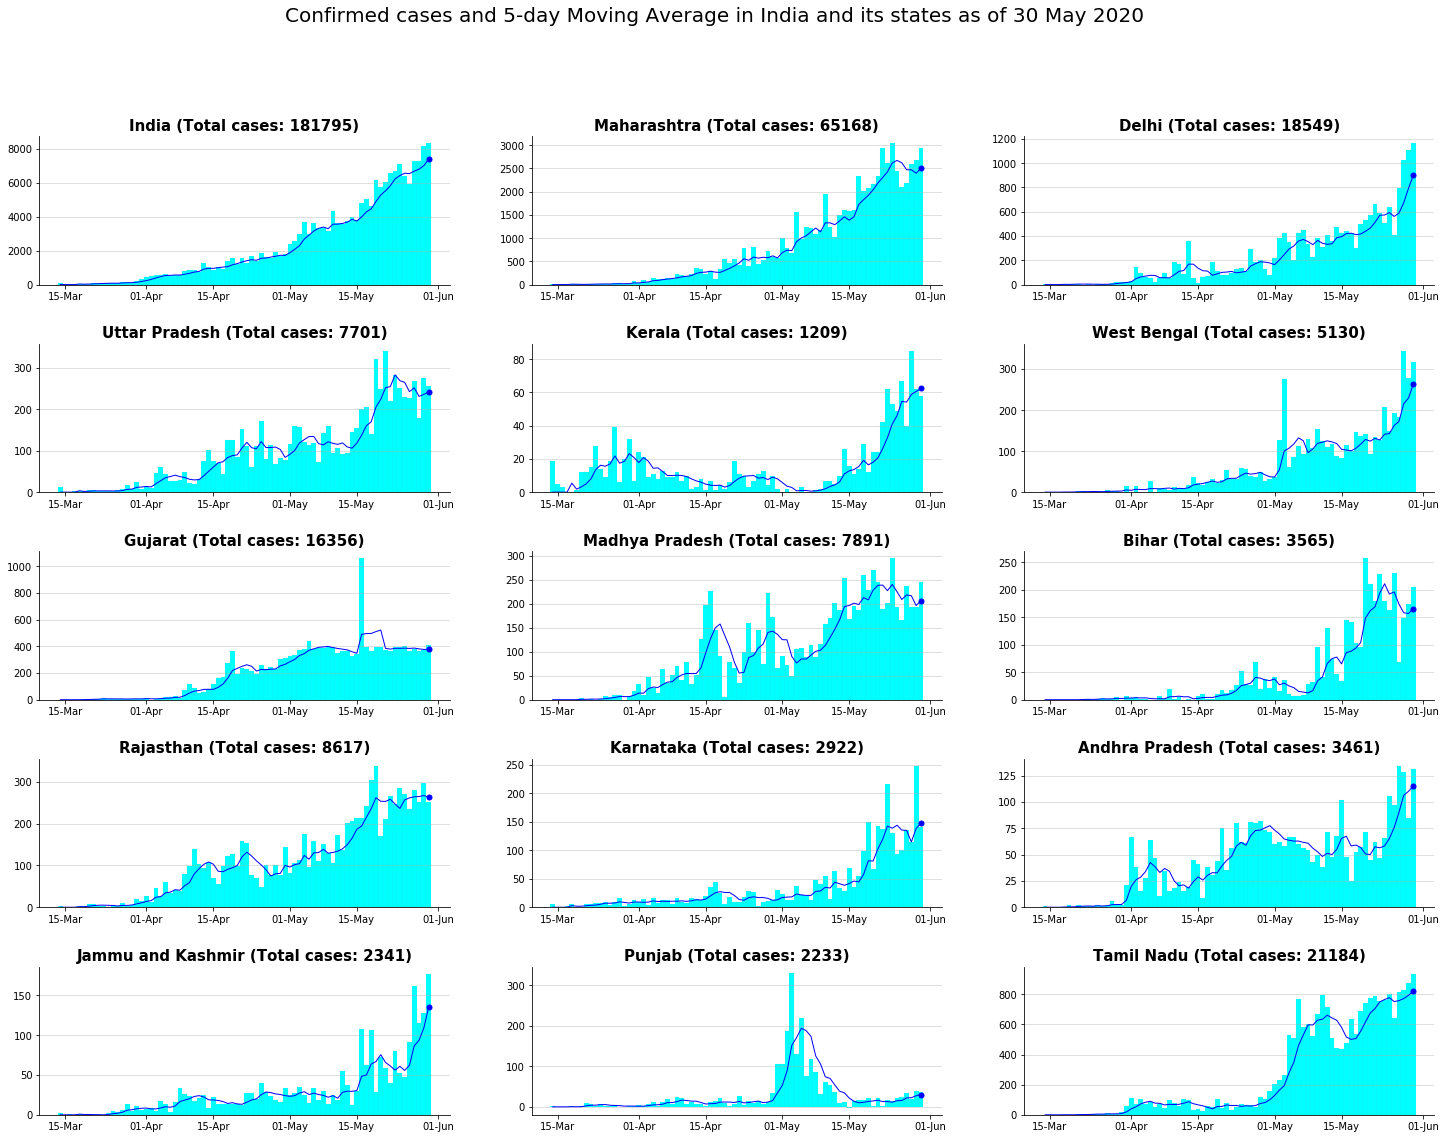

In [8]:
PlotConfirmandMA(list_of_states)